## Assignment 2

> Loritah Bukirwa - J24M19/003

Q1. You are provided with a dataset labelled "arrhythmia-1_data.csv" and a description of the variables within the file "arrhythmia.names.txt". (arrhythmia-1.data.csv Download arrhythmia-1.data.csv). (arrhythmia.names.txt ). Download arrhythmia.names.txt ). 

Use the dataset to determine which features (variables) affect the Heart rate. (10 Marks)

 

Q2. The dataset "Loan_Approval_Data.csv" is used by a banking institution to determine if a loan gets approved or not using various features. Transform the dataset prior to attempting the questions. (Loan_Approval_Data.csv Download Loan_Approval_Data.csv)

a) Determine which features affect the "Loan_Status" (10 Marks)

b) Using a machine learning model, determine if the Loan_Status of; 

i) A female  with the following variables (married, zero dependents, a graduate education, self employed, An Applicant Income of 2000 dollars, CoApplicant Income of 5000 dollars, requesting for a Loan_Amount_Term of 365 days, With No credit history=0, and living in a Semiurban area). (5 Marks)

ii) A male with the following variables (single, 2 dependents, graduate education, employed by a private company, an Applicant income of 4800 dollars, CoApplicant Income of zero (0), requesting a Loan_Amount_Term of 480 days, With credit history =1, and living in an Urban area). (5 Marks)

**Question 1**

 You are provided with a dataset labelled "arrhythmia-1_data.csv" and a description of the variables within the file "arrhythmia.names.txt". (arrhythmia-1.data.csv Download arrhythmia-1.data.csv). (arrhythmia.names.txt ). Download arrhythmia.names.txt ). 

Use the dataset to determine which features (variables) affect the Heart rate. (10 Marks)

In [1]:
#suppress warnings

import warnings 
warnings.filterwarnings('ignore')

#import necessary libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
from scipy.stats import chi2_contingency, f_oneway

#import the data set
ar = pd.read_csv('arrhythmia-1.data.csv')

#drop duplicates
arrh = ar.drop_duplicates()
arrh.head(10)


,Age,Sex,Height,Weight,QRS Duration,P-R interval,Q-T interval,T interval,P interval,QRS,T,P,QRST,J,Heart rate
0,75,0,190,80,91,193,371,174,121,-16,13,64,-2,?,63
1,56,1,165,64,81,174,401,149,39,25,37,-17,31,?,53
2,54,0,172,95,138,163,386,185,102,96,34,70,66,23,75
3,55,0,175,94,100,202,380,179,143,28,11,-5,20,?,71
4,75,0,190,80,88,181,360,177,103,-16,13,61,3,?,?
5,13,0,169,51,100,167,321,174,91,107,66,52,88,?,84
6,40,1,160,52,77,129,377,133,77,77,49,75,65,?,70
7,49,1,162,54,78,0,376,157,70,67,7,8,51,?,67
8,44,0,168,56,84,118,354,160,63,61,69,78,66,84,64
9,50,1,167,67,89,130,383,156,73,85,34,70,71,?,63


In [2]:
#replace ? with 0
arrh.replace('?', 0, inplace=True)
arrh.head(10)

,Age,Sex,Height,Weight,QRS Duration,P-R interval,Q-T interval,T interval,P interval,QRS,T,P,QRST,J,Heart rate
0,75,0,190,80,91,193,371,174,121,-16,13,64,-2,0,63
1,56,1,165,64,81,174,401,149,39,25,37,-17,31,0,53
2,54,0,172,95,138,163,386,185,102,96,34,70,66,23,75
3,55,0,175,94,100,202,380,179,143,28,11,-5,20,0,71
4,75,0,190,80,88,181,360,177,103,-16,13,61,3,0,0
5,13,0,169,51,100,167,321,174,91,107,66,52,88,0,84
6,40,1,160,52,77,129,377,133,77,77,49,75,65,0,70
7,49,1,162,54,78,0,376,157,70,67,7,8,51,0,67
8,44,0,168,56,84,118,354,160,63,61,69,78,66,84,64
9,50,1,167,67,89,130,383,156,73,85,34,70,71,0,63


In [3]:
arrh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Age           452 non-null    int64 
 1   Sex           452 non-null    int64 
 2   Height        452 non-null    int64 
 3   Weight        452 non-null    int64 
 4   QRS Duration  452 non-null    int64 
 5   P-R interval  452 non-null    int64 
 6   Q-T interval  452 non-null    int64 
 7   T interval    452 non-null    int64 
 8   P interval    452 non-null    int64 
 9   QRS           452 non-null    int64 
 10  T             452 non-null    object
 11  P             452 non-null    object
 12  QRST          452 non-null    object
 13  J             452 non-null    object
 14  Heart rate    452 non-null    object
dtypes: int64(10), object(5)
memory usage: 53.1+ KB


In [4]:
#clean and arrange data
#find missing data
arrh_missing = arrh.isnull().sum()
arrh_missing

Age             0
Sex             0
Height          0
Weight          0
QRS Duration    0
P-R interval    0
Q-T interval    0
T interval      0
P interval      0
QRS             0
T               0
P               0
QRST            0
J               0
Heart rate      0
dtype: int64

In [5]:
# Convert columns with data type 'object' to numeric
arrh = arrh.apply(pd.to_numeric, errors='coerce')

# Check the data types after conversion
arrh.dtypes

Age             int64
Sex             int64
Height          int64
Weight          int64
QRS Duration    int64
P-R interval    int64
Q-T interval    int64
T interval      int64
P interval      int64
QRS             int64
T               int64
P               int64
QRST            int64
J               int64
Heart rate      int64
dtype: object

In [6]:
correlation_matrix = arrh.corr()
heart_rate = correlation_matrix['Heart rate']
print("Correlation with Heart rate:\n", heart_rate)

Correlation with Heart rate:
 Age            -0.205626
Sex             0.073106
Height          0.270712
Weight         -0.177579
QRS Duration   -0.005153
P-R interval   -0.050119
Q-T interval   -0.632348
T interval      0.013558
P interval      0.036522
QRS             0.023149
T              -0.068968
P               0.055988
QRST            0.079877
J               0.039045
Heart rate      1.000000
Name: Heart rate, dtype: float64


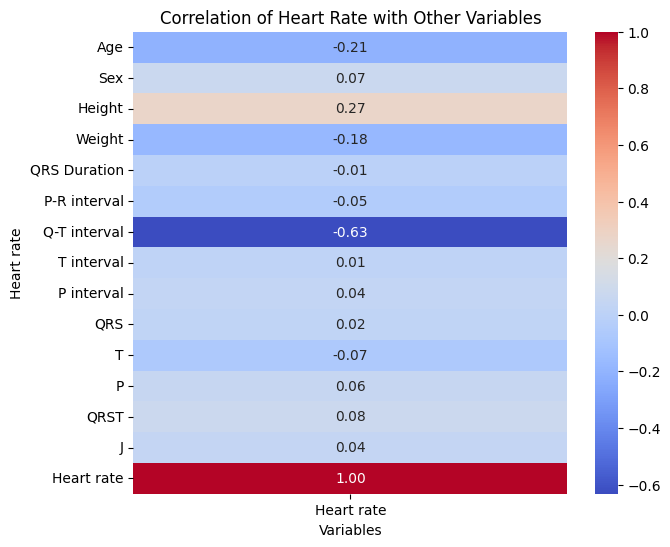

Significant Features affecting Heart rate:
 ['Q-T interval', 'Heart rate']


In [7]:
# Create a heatmap for the correlation values
plt.figure(figsize=(7, 6))
sns.heatmap(heart_rate.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of Heart Rate with Other Variables')
plt.xlabel('Variables')
plt.ylabel('Heart rate')
plt.show()

# Identify significant features affecting Heart rate
significant_features = heart_rate[abs(heart_rate) > 0.5].index.tolist()
print("Significant Features affecting Heart rate:\n", significant_features)

Analysis indicates that Q-T interval has a negative correlation of -0.63 with Heart rate meaning that as the Q-T interval duration increases, the Heart rate tends to decrease. 
This relationship is depicted in the scatter plot below, where each point represents an individual's Q-T interval duration and corresponding Heart rate. 

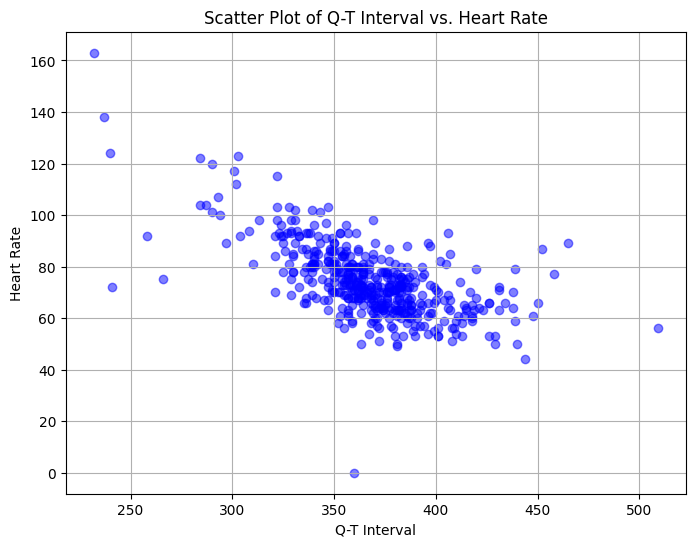

In [8]:
# Extracting Q-T interval and Heart rate columns
qt_interval = arrh['Q-T interval']
heart_rate = arrh['Heart rate']

# Creating the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(qt_interval, heart_rate, alpha=0.5, color='blue')

# Adding labels and title
plt.title('Scatter Plot of Q-T Interval vs. Heart Rate')
plt.xlabel('Q-T Interval')
plt.ylabel('Heart Rate')

# Displaying the plot
plt.grid(True)
plt.show()

This relationship is depicted in the scatter plot above where a clear downward trend suggests that longer Q-T intervals are associated with lower Heart rates.

**Answer**: 

> -  This therefore indicates that heartrate is negative affected by Q-T Interval


**Question 2.** 

The dataset ([Loan_Approval_Data.csv](Loan_Approval_Data.csv)) is used by a banking institution to determine if a loan gets approved or not using various features. Transform the dataset prior to attempting the questions.


a) Determine which features affect the **Loan_Status**.

b) Using a machine learning model, determine if the Loan_Status of:
>
>    **i)** A female  with the following variables (married, zero dependents, a graduate education, self employed, An Applicant Income of 2000 dollars, CoApplicant Income of 5000 dollars, requesting for a Loan_Amount_Term of 365 days, With No credit history=0, and living in a Semiurban area).

>
>    **ii)** A male with the following variables (single, 2 dependents, graduate education, employed by a private company, an Applicant income of 4800 dollars, CoApplicant Income of zero (0), requesting a Loan_Amount_Term of 480 days, With credit history =1, and living in an Urban area).

a)

In [9]:
#import the dataset
ll = pd.read_csv("Loan_Approval_Data.csv")

# Removing duplicate rows if any
loan =ll.drop_duplicates()
print('Shape After deleting duplicate values:', loan.shape)

loan.head(10)

Shape After deleting duplicate values: (614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [10]:
loan.info()

loan.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
# Define the lean_data function
def loan_data(data):
    
    cleaned_data = data.dropna()  # Drop rows with missing values

    # Return the cleaned data
    return cleaned_data

# Call the lean_data function with the loan DataFrame
loan_clean = loan_data(loan)
loan_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


Chi-square tests for categorical variables:
Loan_ID:
  Chi-square: 480.0
  p-value: 0.4785378861882369
Gender:
  Chi-square: 1.6495637942018448
  p-value: 0.1990183114281211
Married:
  Chi-square: 5.557140235492528
  p-value: 0.01840545638635538
Dependents:
  Chi-square: 2.9005746522947455
  p-value: 0.40720999848682704
Education:
  Chi-square: 1.8942441427817767
  p-value: 0.16872400009733113
Self_Employed:
  Chi-square: 0.38076459239371707
  p-value: 0.5371943232746994
Property_Area:
  Chi-square: 12.2259455519901
  p-value: 0.0022139594148752133
Loan_Status:
  Chi-square: 475.3224251702437
  p-value: 2.226300550361324e-105
Categorical Features affecting Loan Status :
 ['Married', 'Property_Area', 'Loan_Status']


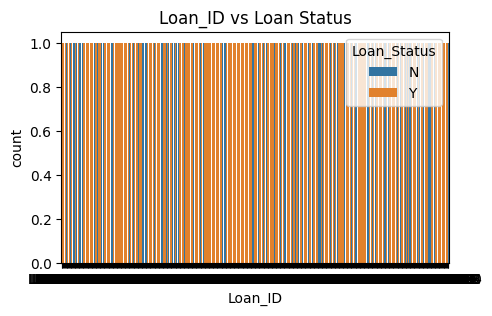

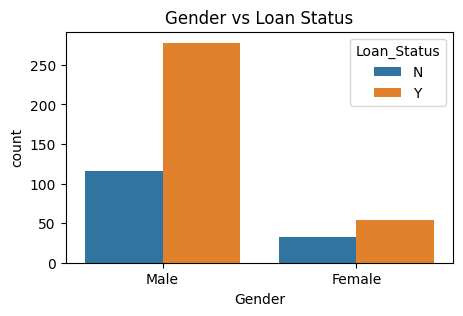

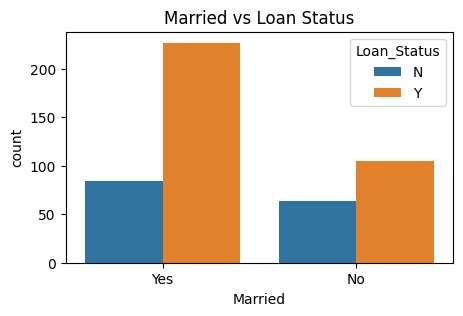

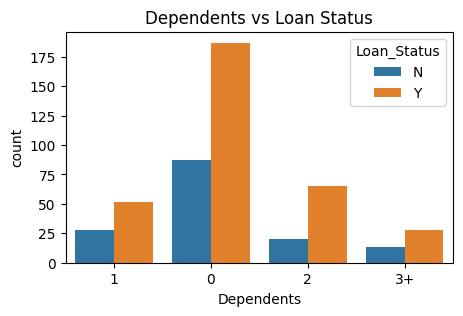

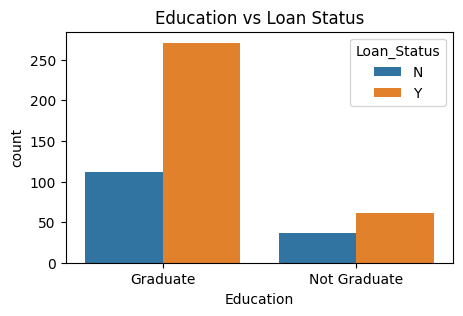

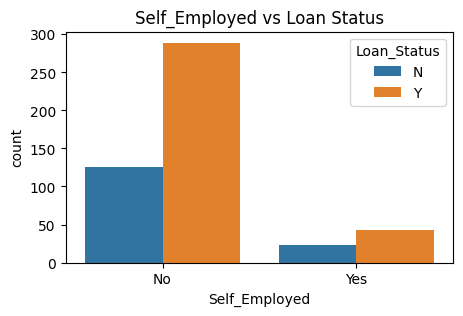

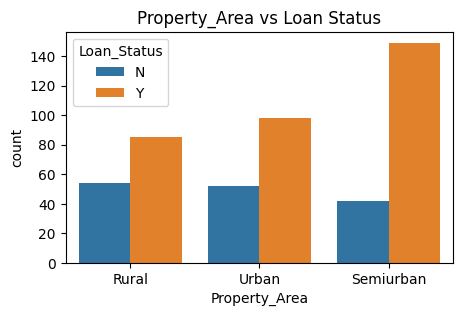

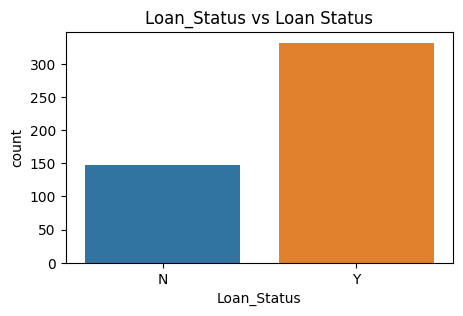

In [12]:
# Visualization: Bar plots for categorical variables
categorical_variables = loan_clean.select_dtypes(include='object').columns

for col in categorical_variables:
    plt.figure(figsize=(5, 3))
    sns.countplot(x=col, hue='Loan_Status', data=loan_clean)
    plt.title(f'{col} vs Loan Status')
    
# Perform chi-square tests for categorical variables
print("Chi-square tests for categorical variables:")

affect_feat = []
for col in categorical_variables:
    contingency_table = pd.crosstab(loan_clean[col], loan_clean['Loan_Status'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"{col}:")
    print("  Chi-square:", chi2)
    print("  p-value:", p)
    
    if p < 0.05:
        affect_feat.append(col)
    
# Identify significant features affecting loan_status in the categorical variables
print("Categorical Features affecting Loan Status :\n", affect_feat)

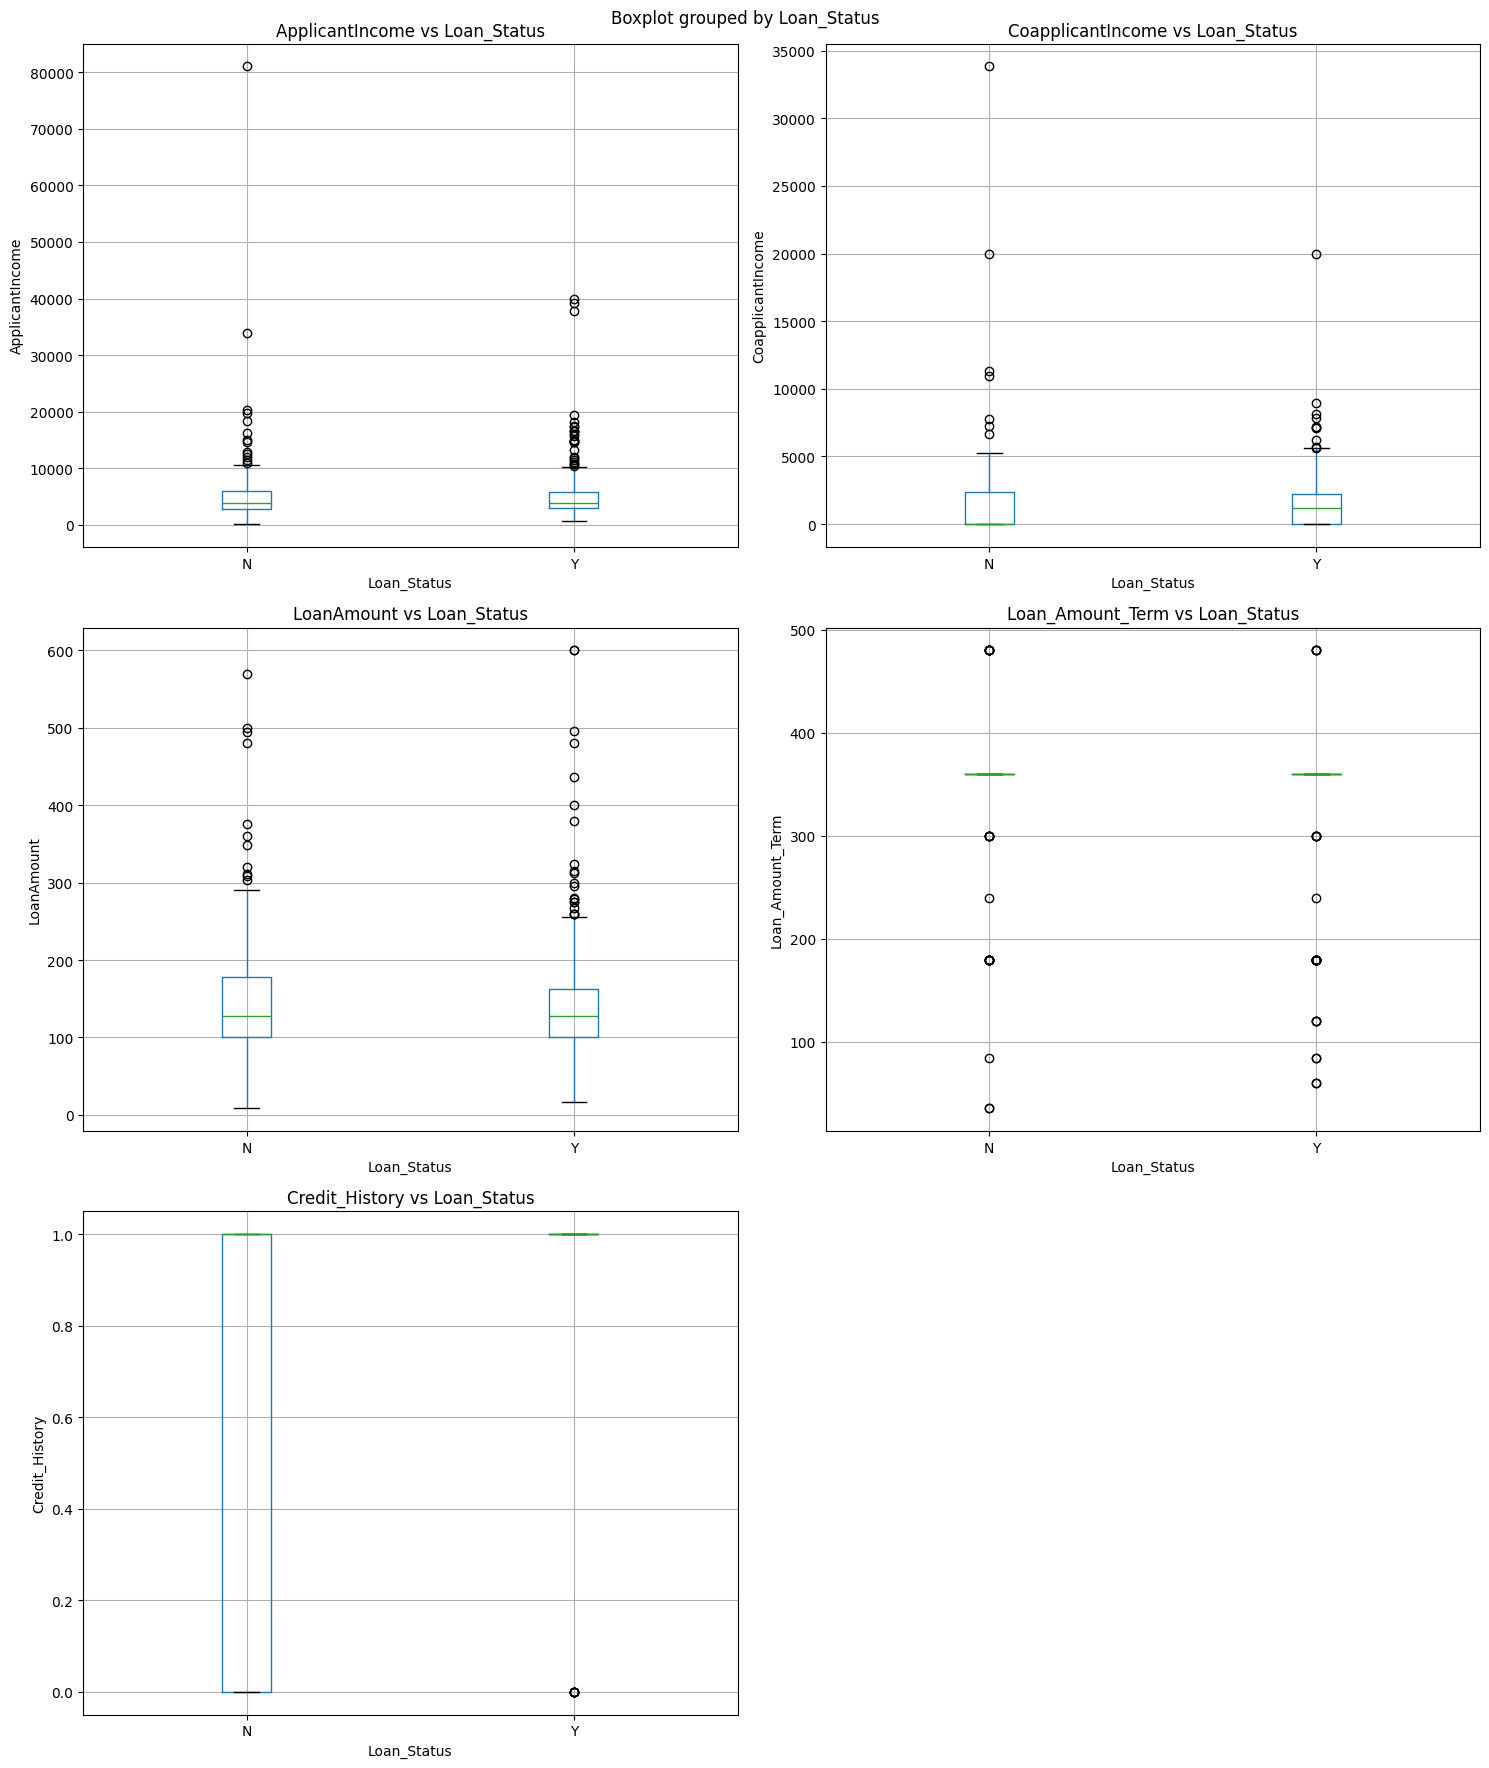


ANOVA tests for numerical variables:
ApplicantIncome:
  F-statistic: 0.8917248095740463
  p-value: 0.34548738715838234
CoapplicantIncome:
  F-statistic: 1.1513590968843053
  p-value: 0.28380622476413325
LoanAmount:
  F-statistic: 2.4736844134051696
  p-value: 0.11642791040849834
Loan_Amount_Term:
  F-statistic: 0.02906542200795027
  p-value: 0.8647002051604279
Credit_History:
  F-statistic: 186.12272687146884
  p-value: 5.0331906338476765e-36
Continous Variables affecting Loan Status :
 ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [13]:
# Visualization for numerical data
numerical_cols = loan_clean.select_dtypes(include=['float64', 'int64']).columns

# Calculate the number of rows needed for subplots
num_rows = (len(numerical_cols) + 1) // 2

# Create subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 6 * num_rows))

# Flatten the subplot axes for easier iteration
axs = axs.flatten()

# Plot box plots for each numerical predictor vs the target variable
for i, predictor in enumerate(numerical_cols):
    loan_clean.boxplot(column=predictor, by='Loan_Status', ax=axs[i])
    axs[i].set_title(f"{predictor} vs Loan_Status")
    axs[i].set_xlabel('Loan_Status')
    axs[i].set_ylabel(predictor)

# Hide any unused subplots
for j in range(i+1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

# Perform ANOVA tests for numerical variables
print("\nANOVA tests for numerical variables:")

affect_num_feat = []
for col in numerical_cols:
    groups = [group[col].values for name, group in loan_clean.groupby('Loan_Status')]
    f_stat, p_value = f_oneway(*groups)
    print(f"{col}:")
    print("  F-statistic:", f_stat)
    print("  p-value:", p_value)
    
    if p < 0.05:
        affect_num_feat.append(col)
    
# Identify significant features affecting loan_status in the categorical variables
print("Continous Variables affecting Loan Status :\n", affect_num_feat)

## **Answer**
> 
Based on the analysis conducted, the following variables have been identified as significant predictors affecting the loan status:

Continuous variables: ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, and Credit_History.


Categorical features: Married, Property_Area, and Loan_Status.
These variables can provide valuable insights into the factors influencing the approval or rejection of loan applications. 

## b) Using a machine learning model, determine if the Loan_Status of; 

i) A female  with the following variables (married, zero dependents, a graduate education, self employed, An Applicant Income of 2000 dollars, CoApplicant Income of 5000 dollars, requesting for a Loan_Amount_Term of 365 days, With No credit history=0, and living in a Semiurban area). (5 Marks)

In [14]:
loan_clean.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [15]:
loan_clean.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [16]:
index_values = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

# Check unique values for each index
for index in index_values:
    unique_values = loan_clean[index].unique()
    print(f"Unique values for '{index}': {unique_values}")

Unique values for 'Gender': ['Male' 'Female']
Unique values for 'Married': ['Yes' 'No']
Unique values for 'Dependents': ['1' '0' '2' '3+']
Unique values for 'Education': ['Graduate' 'Not Graduate']
Unique values for 'Self_Employed': ['No' 'Yes']
Unique values for 'Loan_Amount_Term': [360. 120. 180.  60. 300. 480. 240.  36.  84.]
Unique values for 'Credit_History': [1. 0.]
Unique values for 'Property_Area': ['Rural' 'Urban' 'Semiurban']
Unique values for 'Loan_Status': ['N' 'Y']


In [17]:
# Define mappings for each categorical column
mappings = {
    "Gender": {"Male": 0, "Female": 1},
    "Married": {"Yes": 1, "No": 0},
    "Dependents": {"0": 0, "1": 1, "2": 2, "3+": 3},
    "Education": {"Graduate": 1, "Not Graduate": 0},
    "Self_Employed": {"No": 0, "Yes": 1},
    "Loan_Amount_Term": {360.0: 360, 120.0: 120, 180.0: 180, 60.0: 60, 300.0: 300, 480.0: 480, 240.0: 240, 36.0: 36, 84.0: 84},
    "Credit_History": {1.0: 1, 0.0: 0},
    "Property_Area": {"Rural": 0, "Urban": 1, "Semiurban": 2},
    "Loan_Status": {"N": 0, "Y": 1}
}

# Apply mappings to each column
for column, mapping in mappings.items():
    loan_clean[column].replace(mapping, inplace=True)

# Check the updated DataFrame
loan_clean.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,LP001011,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


In [18]:


# Initialize LabelEncoder
label_encoder = LabelEncoder()

for col in categorical_variables:
    loan_clean[col] = label_encoder.fit_transform(loan_clean[col])

# Generating features input

X = loan_clean.drop(columns=["Loan_Status", "LoanAmount", "Loan_ID"])

print("Features (X):")
print(X.head())

# Generating the target output
y = loan_clean['Loan_Status']

print("\nTarget Variable (y):")
print(y.head()) 

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)




Features (X):
   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
1       0        1           1          1              0             4583   
2       0        1           0          1              1             3000   
3       0        1           0          0              0             2583   
4       0        0           0          1              0             6000   
5       0        1           2          1              1             5417   

   CoapplicantIncome  Loan_Amount_Term  Credit_History  Property_Area  
1             1508.0             360.0             1.0              0  
2                0.0             360.0             1.0              1  
3             2358.0             360.0             1.0              1  
4                0.0             360.0             1.0              1  
5             4196.0             360.0             1.0              1  

Target Variable (y):
1    0
2    1
3    1
4    1
5    1
Name: Loan_Status, dtype: int64


DecisionTreeClassifier()

In [19]:
predictor = model.predict(X_test)
predictor

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0], dtype=int64)

In [20]:
print("Score:", accuracy_score(y_test, predictor))

Score: 0.71875


In [21]:
# Reverse mappings for each categorical column
reverse_mappings = {
    "Gender": {0: "Male", 1: "Female"},
    "Married": {1: "Yes", 0: "No"},
    "Dependents": {0: "0", 1: "1", 2: "2", 3: "3+"},
    "Education": {1: "Graduate", 0: "Not Graduate"},
    "Self_Employed": {0: "No", 1: "Yes"},
    "Loan_Amount_Term": {360: 360.0, 120: 120.0, 180: 180.0, 60: 60.0, 300: 300.0, 480: 480.0, 240: 240.0, 36: 36.0, 84: 84.0},
    "Credit_History": {1: 1.0, 0: 0.0},
    "Property_Area": {0: "Rural", 1: "Urban", 2: "Semiurban"},
    "Loan_Status": {0: "N", 1: "Y"}
}

# Reverse mapping function
def reverse_map(column, value):
    return reverse_mappings[column][value]



In [22]:
female_predictions = model.predict([[1,1, 0, 1,1, 2000, 5000, 365, 0, 2]])

# Reverse map the predicted loan status
predicted_loan_status = reverse_map("Loan_Status", female_predictions[0])

# Display the predicted loan status
print(f"Predicted Loan Status for the female: {predicted_loan_status}")



Predicted Loan Status for the female: N


## **Answer**
> Predicted Loan Status for the female: N

> ii) A male with the following variables (single, 2 dependents, graduate education, employed by a private company, an Applicant income of 4800 dollars, CoApplicant Income of zero (0), requesting a Loan_Amount_Term of 480 days, With credit history =1, and living in an Urban area).

In [23]:
male_predictions = model.predict([[0,0, 2, 1,0, 4800, 0, 480, 1, 1]])

# Reverse map the predicted loan status
predicted_loan_status = reverse_map("Loan_Status", male_predictions[0])

# Display the predicted loan status
print(f"Predicted Loan Status for the Male: {predicted_loan_status}")

Predicted Loan Status for the Male: N


## **Answer**
> Predicted Loan Status for the Male: N